In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from PIL import Image
import numpy as np
import os
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
parent_folder = '/content/drive/MyDrive/archive'

width = 92
height = 112
D = np.zeros((400, 10304))
DTraincentered = np.zeros((200, 10304))
DTestcentered = np.zeros((200, 10304))
testc=0
trainc=0
Dtrain = np.zeros((200, 10304))
Dtest = np.zeros((200, 10304))
Y = np.zeros(400)
Ytrain = np.zeros((200, 1))
Ytest = np.zeros((200, 1))

for sub in range(1,41):
  folder_path = f"{parent_folder}/s{sub}"
  for i in range(1,11):
    filename = f"{folder_path}/{i}.pgm" 
    image = Image.open(filename) 
    image_array = np.array(image)
    D[(sub-1)*10+(i-1)] = image_array.flatten() 
    Y[(sub-1)*10+(i-1)] = sub
    if (i % 2) != 0:
      Dtest[testc] = D[(sub-1)*10+(i-1)]
      Ytest[int(testc)] = Y[(sub-1)*10+(i-1)]
      testc=testc+1
    else:
      Dtrain[trainc] = D[(sub-1)*10+(i-1)]
      Ytrain[int(trainc)] = Y[(sub-1)*10+(i-1)]
      trainc=trainc+1

In [ ]:
for i in range(0,10304):
  DTraincentered[:,i]=Dtrain[:,i]-Dtrain[:,i].mean()

for i in range(0,10304):
  DTestcentered[:,i]=Dtest[:,i]-Dtrain[:,i].mean()

In [ ]:
covarianceMatrix = np.cov(DTraincentered.T)
eigenvalues, eigenvectors = np.linalg.eigh(covarianceMatrix)

In [ ]:
idx = np.argsort(-np.absolute(eigenvalues))   
eigenValues = eigenvalues[idx]
eigenVectors = eigenvectors[:,idx]

In [ ]:
print (eigenValues[0])
print (eigenValues[10303])
print(eigenVectors.shape)
print(np.abs(eigenValues).min())

2782758.443090683
1.0403166359077675e-16
(10304, 10304)
1.0403166359077675e-16


In [ ]:
R=np.zeros(4)
for i in range(0,10304):
  explained=eigenValues[0:i].sum()/eigenValues.sum()
  if explained > 0.8:
    R[0]=i
    break
for i in range(i,10304):
  explained=eigenValues[0:i].sum()/eigenValues.sum()
  if explained > 0.85:
    R[1]=i
    break
for i in range(i,10304):
  explained=eigenValues[0:i].sum()/eigenValues.sum()
  if explained > 0.9:
    R[2]=i
    break
for i in range(i,10304):
  explained=eigenValues[0:i].sum()/eigenValues.sum()
  if explained > 0.95:
    R[3]=i
    break
print(R)

[ 37.  53.  77. 116.]


In [ ]:
U1=eigenVectors[:,:int(R[0])]
U2=eigenVectors[:,:int(R[1])]
U3=eigenVectors[:,:int(R[2])]
U4=eigenVectors[:,:int(R[3])]

In [ ]:
projection_matrix = U1
projected_data1 = np.dot(projection_matrix.T, DTraincentered.T)
projection_matrix = U2
projected_data2 = np.dot(projection_matrix.T, DTraincentered.T)
projection_matrix = U3
projected_data3 = np.dot(projection_matrix.T, DTraincentered.T)
projection_matrix = U4
projected_data4 = np.dot(projection_matrix.T, DTraincentered.T)


In [ ]:
projection_matrix = U1
projected_data5 = np.dot(projection_matrix.T, DTestcentered.T)
projection_matrix = U2
projected_data6 = np.dot(projection_matrix.T, DTestcentered.T)
projection_matrix = U3
projected_data7 = np.dot(projection_matrix.T, DTestcentered.T)
projection_matrix = U4
projected_data8 = np.dot(projection_matrix.T, DTestcentered.T)

In [ ]:
projected_data1_real = np.real(projected_data1.T)
projected_data2_real = np.real(projected_data2.T)
projected_data3_real = np.real(projected_data3.T)
projected_data4_real = np.real(projected_data4.T)
projected_data5_real = np.real(projected_data5.T)
projected_data6_real = np.real(projected_data6.T)
projected_data7_real = np.real(projected_data7.T)
projected_data8_real = np.real(projected_data8.T)

In [ ]:
print(projected_data1_real.shape)

(200, 37)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(projected_data1_real, Ytrain)
print("Accuracy with R = ", R[0], ": ", knn.score(projected_data5_real, Ytest))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(projected_data2_real, Ytrain)
print("Accuracy with R = ", R[1], ": ", knn.score(projected_data6_real, Ytest))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(projected_data3_real, Ytrain)
print("Accuracy with R = ", R[2], ": ", knn.score(projected_data7_real, Ytest))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(projected_data4_real, Ytrain)
print("Accuracy with R = ", R[3], ": ", knn.score(projected_data8_real, Ytest))

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy with R =  37.0 :  0.93
Accuracy with R =  53.0 :  0.94
Accuracy with R =  77.0 :  0.945
Accuracy with R =  116.0 :  0.935


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
k_values = [1, 3, 5, 7]

accuracy_R0=np.zeros(4)
accuracy_R1=np.zeros(4)
accuracy_R2=np.zeros(4)
accuracy_R3=np.zeros(4)

for i in range(0,4):
  knn = KNeighborsClassifier(n_neighbors=k_values[i])
  k=np.zeros(4)
  knn.fit(projected_data1_real, Ytrain)
  accuracy_R0[i]=knn.score(projected_data5_real, Ytest)
  print("Accuracy with R = ", R[0], "and number of neighbors =",k_values[i],": ", accuracy_R0[i])

  knn = KNeighborsClassifier(n_neighbors=k_values[i])
  knn.fit(projected_data2_real, Ytrain)
  accuracy_R1[i]=knn.score(projected_data6_real, Ytest)
  print("Accuracy with R = ", R[1],"and number of neighbors =",k_values[i], ": ",  accuracy_R1[i] )

  knn = KNeighborsClassifier(n_neighbors=k_values[i])
  knn.fit(projected_data3_real, Ytrain)
  accuracy_R2[i]=knn.score(projected_data7_real, Ytest)
  print("Accuracy with R = ", R[2],"and number of neighbors =",k_values[i], ": ", accuracy_R2[i])

  knn = KNeighborsClassifier(n_neighbors=k_values[i])
  knn.fit(projected_data4_real, Ytrain)
  accuracy_R3[i]=knn.score(projected_data8_real, Ytest)
  print("Accuracy with R = ", R[3],"and number of neighbors =",k_values[i], ": ", accuracy_R3[i])

Accuracy with R =  37.0 and number of neighbors = 1 :  0.93
Accuracy with R =  53.0 and number of neighbors = 1 :  0.94
Accuracy with R =  77.0 and number of neighbors = 1 :  0.945
Accuracy with R =  116.0 and number of neighbors = 1 :  0.935
Accuracy with R =  37.0 and number of neighbors = 3 :  0.855
Accuracy with R =  53.0 and number of neighbors = 3 :  0.855
Accuracy with R =  77.0 and number of neighbors = 3 :  0.85
Accuracy with R =  116.0 and number of neighbors = 3 :  0.845
Accuracy with R =  37.0 and number of neighbors = 5 :  0.805
Accuracy with R =  53.0 and number of neighbors = 5 :  0.83
Accuracy with R =  77.0 and number of neighbors = 5 :  0.815
Accuracy with R =  116.0 and number of neighbors = 5 :  0.815
Accuracy with R =  37.0 and number of neighbors = 7 :  0.78
Accuracy with R =  53.0 and number of neighbors = 7 :  0.775
Accuracy with R =  77.0 and number of neighbors = 7 :  0.755
Accuracy with R =  116.0 and number of neighbors = 7 :  0.74


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

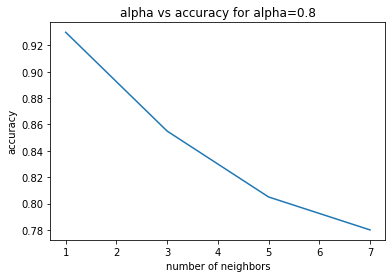

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_values,accuracy_R0)

# Set axis labels and title
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.title('alpha vs accuracy for alpha=0.8')

# Show the plot
plt.show()

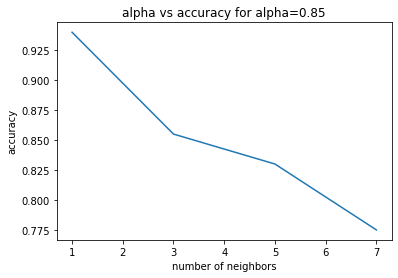

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_values,accuracy_R1)

# Set axis labels and title
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.title('alpha vs accuracy for alpha=0.85')

# Show the plot
plt.show()

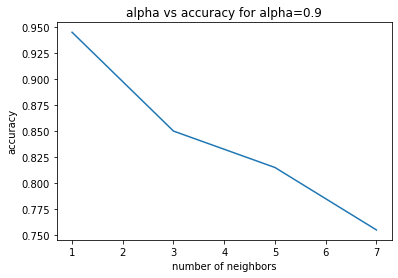

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_values,accuracy_R2)

# Set axis labels and title
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.title('alpha vs accuracy for alpha=0.9')

# Show the plot
plt.show()

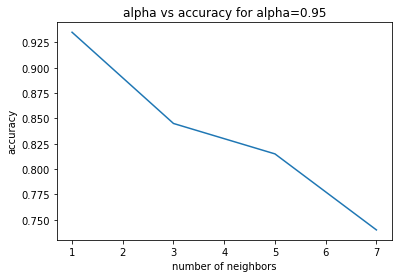

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_values,accuracy_R3)

# Set axis labels and title
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.title('alpha vs accuracy for alpha=0.95')

# Show the plot
plt.show()

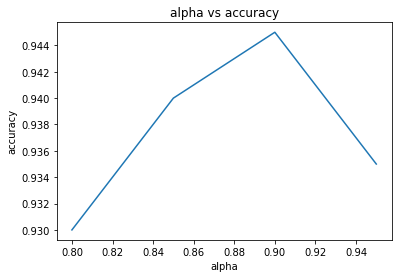

In [ ]:
import matplotlib.pyplot as plt
plt.plot([0.8,0.85,0.9,0.95], [accuracy_R0[0],accuracy_R1[0],accuracy_R2[0],accuracy_R3[0]])

# Set axis labels and title
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.title('alpha vs accuracy')

# Show the plot
plt.show()

In [ ]:
Mu = np.zeros((40, 10304))
for i in range (0,40):
  Mu[i]=np.mean(Dtrain[(i*5):(i*5)+4,:], axis=0)

In [ ]:
print(Mu[1].reshape(10304,1).shape)

(10304, 1)


In [ ]:
Sb=np.zeros((10304,10304))
for i in range (0,40):
  Sb=Sb+5*np.dot((Mu[i].reshape(10304,1)-np.mean(Dtrain, axis=0).reshape(10304,1)),(Mu[i].reshape(10304,1)-np.mean(Dtrain, axis=0).reshape(10304,1)).T)

In [ ]:
print(Sb.shape)

(10304, 10304)


In [ ]:
LDAcentertrain = np.zeros(((40,5,10304)))
for i in range(0,40):
  for j in range(0,5):
    LDAcentertrain[i,j]+=Dtrain[int(i*5+j)]-Mu[int(i)]

In [ ]:
S = np.zeros(((10304,10304)))
for i in range(0, 40):
    S+= np.matmul(LDAcentertrain[i].T,LDAcentertrain[i])

In [ ]:
IS = np.linalg.inv(S)

In [ ]:
eigenvalues2, eigenvectors2 = np.linalg.eigh(np.dot(IS,Sb))

In [ ]:
idx = np.argsort(-np.absolute(eigenvalues2))   
eigenValues2 = eigenvalues2[idx]
eigenVectors2 = eigenvectors2[:,idx]

In [ ]:
print(eigenValues2[0])
print(eigenValues2[10000])

-1.0189777131130989e+19
64545133249338.766


In [ ]:
U5=eigenVectors2[:,:39]
projection_matrix = U5
projected_data9 = np.dot(projection_matrix.T, DTraincentered.T)
projected_data10 = np.dot(projection_matrix.T, DTestcentered.T)

In [ ]:
projected_data9_real = np.real(projected_data9.T)
projected_data10_real = np.real(projected_data10.T)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(projected_data9_real, Ytrain)
print("Accuracy with R = 39: ", knn.score(projected_data10_real, Ytest))

Accuracy with R = 39:  0.935


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print (eigenValues2[0])
print(eigenValues2.shape)
print(np.abs(eigenValues2).min())

5.4826415849157e+21
(10304,)
2318515067130941.5


In [ ]:
k_values = [1, 3, 5, 7]
accuracy=np.zeros(4)

for i in range (0,4):
  knn = KNeighborsClassifier(n_neighbors=k_values[i])
  knn.fit(projected_data9_real, Ytrain)
  accuracy[i]=knn.score(projected_data10_real, Ytest)
  print("Accuracy with number of neighbors ",k_values[i],": ", accuracy[i])

Accuracy with number of neighbors  1 :  0.835
Accuracy with number of neighbors  3 :  0.78
Accuracy with number of neighbors  5 :  0.78
Accuracy with number of neighbors  7 :  0.73


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

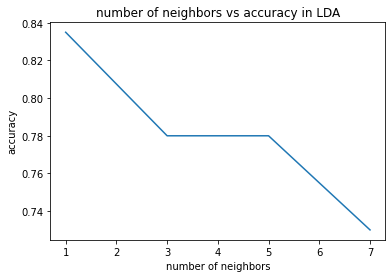

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_values, accuracy)

# Set axis labels and title
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.title('number of neighbors vs accuracy in LDA')

# Show the plot
plt.show()

### NEW

In [ ]:
parent_folder = '/content/drive/MyDrive/nonface/natural_images'

nonfacenum=700
width = 92
height = 112
D2 = np.zeros((int(400+nonfacenum), 10304))
DTraincentered2 = np.zeros((int(nonfacenum), 10304))
DTestcentered2 = np.zeros((400, 10304))
testc2=0
trainc2=0
Dtrain2 = np.zeros((int(nonfacenum), 10304))
Dtest2 = np.zeros((400, 10304))
Y2 = np.zeros((int(400+nonfacenum),1))
Ytrain2 = np.zeros((int(nonfacenum), 1))
Ytest2 = np.zeros((400, 1))
D2[0:400]=D
Y2=[np.ones((1,400)),np.zeros((1,int(nonfacenum)))]
s=400
# for sub in range(1,41):
for filename in os.listdir(parent_folder):
  folder_path = f"{parent_folder}/{filename}"
  for i in range(0,100):
    if i<10:
      filename2 = f"{folder_path}/{filename}_000{i}.jpg" 
    else:
      filename2 = f"{folder_path}/{filename}_00{i}.jpg" 
    image = Image.open(filename2)
    image = image.resize((92, 112))
    image = image.convert('L')  
    image_array = np.array(image)
    D2[s] = image_array.flatten()
    s=s+1
    # if (i % 2) != 0:
    #   Dtest[testc] = D[(sub-1)*10+(i-1)]
    #   Ytest[int(testc)] = Y[(sub-1)*10+(i-1)]
    #   testc=testc+1
    # else:
    #   Dtrain[trainc] = D[(sub-1)*10+(i-1)]
    #   Ytrain[int(trainc)] = Y[(sub-1)*10+(i-1)]
    #   trainc=trainc+1
np.random.shuffle(D2[0:400])
np.random.shuffle(D2[400:int(nonfacenum+400)])
Dtrain2[0:200]=D2[0:200]
Dtrain2[200:int(nonfacenum)]=D2[400:int(nonfacenum)+200]
Ytrain2[0:200]=np.ones((200,1))
Dtest2[0:200]=D2[200:400]
Dtest2[200:400]=D2[int(nonfacenum+200):int(nonfacenum+400)]
Ytest2[0:200]=np.ones((200,1))

# for i in range(400,int(nonfacenum)+200):
#   Dtrain2[i]=D2[j+i]
#   if i%int(nonfacenum/7-29)==0:
#       j=j+int(nonfacenum/7)
# Ytrain2[0:200]=np.ones((1,200))
# Dtest2[0:200]=D2[200:400]
# j=0
# for i in range(0,200):
#   Dtest2[200+i]=D2[int(nonfacenum/7-20+i)]
#   if i%int(nonfacenum/7)==0:
#       j=j+int(nonfacenum/7)
# Ytest2[0:200]=np.ones((1,200))

In [ ]:
for i in range(0,10304):
  DTraincentered2[:,i]=Dtrain2[:,i]-Dtrain2[:,i].mean()

for i in range(0,10304):
  DTestcentered2[:,i]=Dtest2[:,i]-Dtrain2[:,i].mean()

In [ ]:
covarianceMatrix22 = np.cov(DTraincentered2.T)
eigenvalues22, eigenvectors22 = np.linalg.eigh(covarianceMatrix22)

In [ ]:
idx = np.argsort(-(eigenvalues22))   
eigenValues22 = eigenvalues22[idx]
eigenVectors22 = eigenvectors22[:,idx]

In [ ]:
print (eigenValues22[0])
print (eigenValues22[10303])
print(eigenVectors22.shape)
print(np.abs(eigenValues22).min())

14552185.88212555
-6.23639636148139e-09
(10304, 10304)
2.663598867505591e-15


In [ ]:
for i in range(0,int(nonfacenum)):
  explained=eigenValues22[0:i].sum()/eigenValues22.sum()
  if explained > 0.9:
    R=i
    break
print(R)

124


In [ ]:
U21=eigenVectors22[:,:int(R)]
projection_matrix = U21
projected_data21 = np.dot(projection_matrix.T, DTraincentered2.T)
projected_data22 = np.dot(projection_matrix.T, DTestcentered2.T)

In [ ]:
# U21=eigenVectors22[:,:int(R)]
# projection_matrix = U21
# projected_data21 = np.dot(DTraincentered2,projection_matrix)
# projected_data22 = np.dot(DTestcentered2,projection_matrix)

In [ ]:
projected_data21 = np.real(projected_data21.T)
projected_data22 = np.real(projected_data22.T)

In [ ]:
print(projection_matrix.shape)
print(DTraincentered2.shape)
print(projected_data21.T.shape)
print(Ytrain2.shape)
print(projected_data22.T.shape)
print(Ytest2.shape)


(10304, 124)
(700, 10304)
(124, 700)
(700, 1)
(124, 400)
(400, 1)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(projected_data21, Ytrain2)
print("Accuracy with R = ", R, ": ", knn.score(projected_data22, Ytest2))

Accuracy with R =  124 :  0.945


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
Mu1=np.mean(Dtrain2[:200,:], axis=0)
Mu2=np.mean(Dtrain2[200:,:], axis=0)

In [ ]:
print(Dtrain2[:200,:].shape)
print(Dtrain2[200:,:].shape)

(200, 10304)
(500, 10304)


In [ ]:
# Sb=np.dot(((Mu1-Mu2).reshape(10304,1)),(Mu1-Mu2).reshape(10304,1).T)


Sb=np.zeros((10304,10304))
Sb=200*np.dot((Mu1.reshape(10304,1)-np.mean(Dtrain, axis=0).reshape(10304,1)),(Mu1.reshape(10304,1)-np.mean(Dtrain, axis=0).reshape(10304,1)).T)+500*np.dot((Mu2.reshape(10304,1)-np.mean(Dtrain, axis=0).reshape(10304,1)),(Mu2.reshape(10304,1)-np.mean(Dtrain, axis=0).reshape(10304,1)).T)

In [ ]:
print(Sb)

[[2181059.848  2177243.332  2151569.354  ... 2293514.828  2406702.166
  2499127.312 ]
 [2177243.332  2173475.183  2147873.101  ... 2289076.887  2402209.924
  2494399.623 ]
 [2151569.354  2147873.101  2122590.6845 ... 2261804.439  2373698.1155
  2464752.156 ]
 ...
 [2293514.828  2289076.887  2261804.439  ... 2416093.463  2533652.366
  2631593.827 ]
 [2406702.166  2402209.924  2373698.1155 ... 2533652.366  2657580.9295
  2760064.639 ]
 [2499127.312  2494399.623  2464752.156  ... 2631593.827  2760064.639
  2866595.333 ]]


In [ ]:
LDAcentertrain22=np.zeros((nonfacenum,10304))
i=0
for r in Dtrain2:
  if i<200:
    LDAcentertrain22[i]=r-Mu1
  else:
    LDAcentertrain22[i]=r-Mu2
  i=i+1


In [ ]:
S1=np.matmul(LDAcentertrain22[:200,:].T,LDAcentertrain22[:200,:])
S2=np.matmul(LDAcentertrain22[200:,:].T,LDAcentertrain22[200:,:])
S=S1+S2
# S=np.cov(S)

In [ ]:
# for c in Dtrain2:
#     S += np.cov(c.T, bias=True) * (len(c) - 1)

In [ ]:
IS = np.linalg.inv(S)

In [ ]:
eigenvalues22, eigenvectors22 = np.linalg.eigh(np.dot(IS,Sb))

In [ ]:
idx = np.argsort(-(eigenvalues22))   
eigenValues22 = eigenvalues22[idx]
eigenVectors22 = eigenvectors22[:,idx]

In [ ]:
U22=eigenVectors22[:,:2]
projection_matrix = U22
projected_data22 = np.dot(projection_matrix.T, DTraincentered2.T)
projected_data222 = np.dot(projection_matrix.T, DTestcentered2.T)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(projected_data22.T, Ytrain2)
print("Accuracy with R = 1: ", knn.score(projected_data222.T, Ytest2))

Accuracy with R = 1:  0.845


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


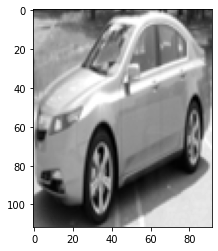

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

plt.imshow(Dtrain2[200].reshape(112,92), cmap='gray')

# Show the plot
plt.show()

In [ ]:
print(projected_data22.T.shape)
print(Ytrain2.shape)
print(projected_data222.T.shape)
print(Ytest2.shape)

(700, 1)
(700, 1)
(400, 1)
(400, 1)


In [ ]:
print(projected_data22[0,300])

3.678345659635383


### Old

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp "/content/drive/My Drive/kaggle.json" ~/.kaggle/
!kaggle datasets download -d prasunroy/natural-images -p /content/drive/MyDrive/nonfaceimages


In [ ]:
!unzip '/content/drive/MyDrive/nonfaceimages/natural-images.zip' -d '/content/drive/MyDrive/nonface'

In [ ]:
import cv2
import numpy as np
import os
nonface_images = []
dataMatrixnonface = np.zeros((350, 10304))
# Function to resize images to 92x112 pixels
images_folder = "/content/drive/MyDrive/nonface/data/natural_images/flower/"
resized_images_folder = os.path.join(images_folder, 'resized')
print(os.listdir(images_folder))
os.makedirs(resized_images_folder, exist_ok=True)
i=0
for filename in os.listdir(images_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load image and resize to 92x112 pixels
        image_path = os.path.join(images_folder, filename)
        image = Image.open(f"{images_folder}/{filename}")
         # Convert the image to grayscale 
        image = image.convert('L') 
        img_resized = image.resize((92, 112))
        image_array_nonface = np.array(img_resized).flatten()
        dataMatrixnonface[i]=image_array_nonface
        i=i+1
        if i==50:
          break




['flower_0037.jpg', 'flower_0073.jpg', 'flower_0000.jpg', 'flower_0058.jpg', 'flower_0023.jpg', 'flower_0018.jpg', 'flower_0025.jpg', 'flower_0056.jpg', 'flower_0034.jpg', 'flower_0054.jpg', 'flower_0067.jpg', 'flower_0087.jpg', 'flower_0082.jpg', 'flower_0039.jpg', 'flower_0051.jpg', 'flower_0065.jpg', 'flower_0053.jpg', 'flower_0076.jpg', 'flower_0066.jpg', 'flower_0002.jpg', 'flower_0014.jpg', 'flower_0011.jpg', 'flower_0043.jpg', 'flower_0062.jpg', 'flower_0015.jpg', 'flower_0074.jpg', 'flower_0042.jpg', 'flower_0005.jpg', 'flower_0069.jpg', 'flower_0041.jpg', 'flower_0028.jpg', 'flower_0029.jpg', 'flower_0024.jpg', 'flower_0001.jpg', 'flower_0048.jpg', 'flower_0086.jpg', 'flower_0052.jpg', 'flower_0020.jpg', 'flower_0049.jpg', 'flower_0003.jpg', 'flower_0012.jpg', 'flower_0072.jpg', 'flower_0036.jpg', 'flower_0026.jpg', 'flower_0092.jpg', 'flower_0064.jpg', 'flower_0045.jpg', 'flower_0050.jpg', 'flower_0022.jpg', 'flower_0046.jpg', 'flower_0010.jpg', 'flower_0057.jpg', 'flower_006

In [ ]:

# Function to resize images to 92x112 pixels
images_folder = "/content/drive/MyDrive/nonface/data/natural_images/dog/"

for filename in os.listdir(images_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load image and resize to 92x112 pixels
        image_path = os.path.join(images_folder, filename)
        image = Image.open(f"{images_folder}/{filename}")
         # Convert the image to grayscale 
        image = image.convert('L') 
        img_resized = image.resize((92, 112))
        image_array_nonface = np.array(img_resized).flatten()
        dataMatrixnonface[i]=image_array_nonface
        i=i+1
        if i==100:
          break




In [ ]:

# Function to resize images to 92x112 pixels
images_folder = "/content/drive/MyDrive/nonface/data/natural_images/cat/"


for filename in os.listdir(images_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load image and resize to 92x112 pixels
        image_path = os.path.join(images_folder, filename)
        image = Image.open(f"{images_folder}/{filename}")
         # Convert the image to grayscale 
        image = image.convert('L') 
        img_resized = image.resize((92, 112))
        image_array_nonface = np.array(img_resized).flatten()
        dataMatrixnonface[i]=image_array_nonface
        i=i+1
        if i==150:
          break




In [ ]:

# Function to resize images to 92x112 pixels
images_folder = "/content/drive/MyDrive/nonface/data/natural_images/fruit/"


for filename in os.listdir(images_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load image and resize to 92x112 pixels
        image_path = os.path.join(images_folder, filename)
        image = Image.open(f"{images_folder}/{filename}")
         # Convert the image to grayscale 
        image = image.convert('L') 
        img_resized = image.resize((92, 112))
        image_array_nonface = np.array(img_resized).flatten()
        dataMatrixnonface[i]=image_array_nonface
        i=i+1
        if i==200:
          break




In [ ]:

# Function to resize images to 92x112 pixels
images_folder = "/content/drive/MyDrive/nonface/data/natural_images/airplane/"


for filename in os.listdir(images_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load image and resize to 92x112 pixels
        image_path = os.path.join(images_folder, filename)
        image = Image.open(f"{images_folder}/{filename}")
         # Convert the image to grayscale 
        image = image.convert('L') 
        img_resized = image.resize((92, 112))
        image_array_nonface = np.array(img_resized).flatten()
        dataMatrixnonface[i]=image_array_nonface
        i=i+1
        if i==250:
          break




In [ ]:

# Function to resize images to 92x112 pixels
images_folder = "/content/drive/MyDrive/nonface/data/natural_images/motorbike/"
resized_images_folder = os.path.join(images_folder, 'resized')
print(os.listdir(images_folder))
os.makedirs(resized_images_folder, exist_ok=True)

for filename in os.listdir(images_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load image and resize to 92x112 pixels
        image_path = os.path.join(images_folder, filename)
        image = Image.open(f"{images_folder}/{filename}")
         # Convert the image to grayscale 
        image = image.convert('L') 
        img_resized = image.resize((92, 112))
        image_array_nonface = np.array(img_resized).flatten()
        dataMatrixnonface[i]=image_array_nonface
        i=i+1
        if i==300:
          break




['motorbike_0304.jpg', 'motorbike_0775.jpg', 'motorbike_0198.jpg', 'motorbike_0003.jpg', 'motorbike_0336.jpg', 'motorbike_0270.jpg', 'motorbike_0448.jpg', 'motorbike_0488.jpg', 'motorbike_0466.jpg', 'motorbike_0036.jpg', 'motorbike_0415.jpg', 'motorbike_0691.jpg', 'motorbike_0335.jpg', 'motorbike_0518.jpg', 'motorbike_0157.jpg', 'motorbike_0517.jpg', 'motorbike_0263.jpg', 'motorbike_0732.jpg', 'motorbike_0347.jpg', 'motorbike_0009.jpg', 'motorbike_0239.jpg', 'motorbike_0279.jpg', 'motorbike_0652.jpg', 'motorbike_0505.jpg', 'motorbike_0113.jpg', 'motorbike_0404.jpg', 'motorbike_0180.jpg', 'motorbike_0343.jpg', 'motorbike_0371.jpg', 'motorbike_0346.jpg', 'motorbike_0612.jpg', 'motorbike_0013.jpg', 'motorbike_0774.jpg', 'motorbike_0442.jpg', 'motorbike_0531.jpg', 'motorbike_0372.jpg', 'motorbike_0677.jpg', 'motorbike_0640.jpg', 'motorbike_0494.jpg', 'motorbike_0088.jpg', 'motorbike_0158.jpg', 'motorbike_0354.jpg', 'motorbike_0734.jpg', 'motorbike_0071.jpg', 'motorbike_0384.jpg', 'motorbik

In [ ]:

# Function to resize images to 92x112 pixels
images_folder = "/content/drive/MyDrive/nonface/data/natural_images/car/"


for filename in os.listdir(images_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load image and resize to 92x112 pixels
        image_path = os.path.join(images_folder, filename)
        image = Image.open(f"{images_folder}/{filename}")
         # Convert the image to grayscale 
        image = image.convert('L') 
        img_resized = image.resize((92, 112))
        image_array_nonface = np.array(img_resized).flatten()
        dataMatrixnonface[i]=image_array_nonface
        i=i+1
        if i>=350:
          break




In [ ]:
face_labels = np.ones(len(D))
nonface_labels = np.zeros(len(dataMatrixnonface))
images = np.concatenate((D, dataMatrixnonface), axis=0)

labels = np.concatenate((face_labels, nonface_labels))

print(images.shape)
print(labels.shape)


(750, 10304)
(750,)


In [ ]:
D2Traincentered = np.zeros((270, 10304))
D2Testcentered = np.zeros((480, 10304))

D2train = np.zeros((270, 10304))
D2test = np.zeros((480, 10304))

labeltrain = np.zeros((270, 1))
labeltest = np.zeros((480, 1))

In [ ]:
for i in range (0,200):
  D2train[i]=Dtrain[i]
  labeltrain[i]=1
sub=0;
i=200
for sub in range (0,7):
  for j in range (0,10): 
    D2train[i]=dataMatrixnonface[(sub*50)+j]
    labeltrain[i]=0
    i=i+1
    


In [ ]:
for i in range (0,200):
  D2test[i]=Dtest[i]
  labeltest[i]=1

sub=0;
i=200
for sub in range (0,7):
  for j in range (10,50): 
    D2test[i]=dataMatrixnonface[(sub*50)+j]
    labeltest[i]=0
    i=i+1

In [ ]:
for i in range(0,10304):
  D2Traincentered[:,i]=D2train[:,i]-D2train[:,i].mean()

for i in range(0,10304):
  D2Testcentered[:,i]=D2test[:,i]-D2train[:,i].mean()

In [ ]:
covarianceMatrix_faces_nonface = np.cov(D2Traincentered.T)
eigenvalues_faces_nonface, eigenvectors_faces_nonface = np.linalg.eigh(covarianceMatrix_faces_nonface)

In [ ]:
idx = eigenvalues_faces_nonface.argsort()[::-1]   
eigenValues_faces_nonface = eigenvalues_faces_nonface[idx]
eigenVectors_faces_nonface = eigenvectors_faces_nonface[:,idx]

In [ ]:
R=np.zeros(3)
for i in range(0,270):
  explained=eigenValues_faces_nonface[0:i].sum()/eigenValues_faces_nonface.sum()
  if explained > 0.85:
    R[0]=i
    break

print(R)

[46.  0.  0.]


In [ ]:
U=eigenVectors_faces_nonface[:,0:int(R[0])]

projection_matrix = U
projected_data_train = np.dot(projection_matrix.T, D2Traincentered.T)


projected_data_test = np.dot(projection_matrix.T, D2Testcentered.T)
projected_data_test_real = np.real(projected_data_test.T)
projected_data_train_real = np.real(projected_data_train.T)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
k=np.zeros(3)
knn.fit(projected_data_train_real, labeltrain)
k[0]=knn.score(projected_data_test_real, labeltest)
print("Accuracy with R = ", R[0], ": ", k[0])

Accuracy with R =  46.0 :  0.81875


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
Mu = np.zeros((40, 10304))
for i in range (0,40):
  Mu[i]=np.mean(D2train[(i*5):(i*5)+4,:], axis=0)

Sb=0
for i in range (0,40):
  Sb=Sb+5*np.matmul((Mu[i]-np.mean(D2train, axis=0)),(Mu[i]-np.mean(D2train, axis=0)).T)


LDAcentertrain = np.zeros(((40,5,10304)))
for i in range(0,40):
  for j in range(0,5):
    LDAcentertrain[i,j]+=D2train[int(i*5+j)]-Mu[int(i)]


S = np.zeros(((10304,10304)))
for i in range(0, 40):
    S+= np.matmul(LDAcentertrain[i].T,LDAcentertrain[i])


IS = np.linalg.inv(S)

In [ ]:
eigenvalues_faces_nonface2, eigenvectors_faces_nonface2 = np.linalg.eigh(IS*Sb)

idx = eigenvalues_faces_nonface2.argsort()[::-1]   
eigenValues_faces_nonface2 = eigenvalues_faces_nonface2[idx]
eigenVectors_faces_nonface2 = eigenvectors_faces_nonface2[:,idx]

In [ ]:
k2=np.zeros(3)
U2=eigenVectors_faces_nonface2[:,0:7]
projection_matrix2 = U2
projected_data_train2 = np.dot(projection_matrix2.T, D2Traincentered.T)
projected_data_test2 = np.dot(projection_matrix2.T, D2Testcentered.T)

projected_data_train_real2 = np.real(projected_data_train2.T)
projected_data_test_real2 = np.real(projected_data_test2.T)


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(projected_data_train_real2, labeltrain)
k2[0]=knn.score(projected_data_test_real2, labeltest)
print("Accuracy with R = 39: ",k2[0] )

Accuracy with R = 39:  0.78125


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
import os
import cv2
from sklearn import svm
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
# Train and evaluate classifier
clf = svm.SVC()
clf.fit(projected_data_train_real, labeltrain)
test_pred = clf.predict(projected_data_test_real)


# Generate confusion matrix
cm = confusion_matrix(labeltest, test_pred)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[246  34]
 [  0 200]]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
D2Traincentered = np.zeros((340, 10304))
D2Testcentered = np.zeros((410, 10304))

D2train = np.zeros((340, 10304))
D2test = np.zeros((410, 10304))

labeltrain = np.zeros((340, 1))
labeltest = np.zeros((410, 1))

for i in range (0,200):
  D2train[i]=Dtrain[i]
  labeltrain[i]=1
sub=0;
i=200
for sub in range (0,7):
  for j in range (0,20): 
    D2train[i]=dataMatrixnonface[(sub*50)+j]
    labeltrain[i]=0
    i=i+1

for i in range (0,200):
  D2test[i]=Dtest[i]
  labeltest[i]=1

sub=0;
i=200
for sub in range (0,7):
  for j in range (20,50): 
    D2test[i]=dataMatrixnonface[(sub*50)+j]
    labeltest[i]=0
    i=i+1

for i in range(0,10304):
  D2Traincentered[:,i]=D2train[:,i]-D2train[:,i].mean()

for i in range(0,10304):
  D2Testcentered[:,i]=D2test[:,i]-D2train[:,i].mean()

In [ ]:
covarianceMatrix_faces_nonface = np.cov(D2Traincentered.T)
eigenvalues_faces_nonface, eigenvectors_faces_nonface = np.linalg.eigh(covarianceMatrix_faces_nonface)

idx = eigenvalues_faces_nonface.argsort()[::-1]   
eigenValues_faces_nonface = eigenvalues_faces_nonface[idx]
eigenVectors_faces_nonface = eigenvectors_faces_nonface[:,idx]

print(eigenValues_faces_nonface)

[ 1.18876316e+07  4.24474896e+06  2.39718861e+06 ... -3.76335743e-09
 -4.08593266e-09 -4.47140284e-09]


In [ ]:
for i in range(0,340):
  explained=eigenValues_faces_nonface[0:i].sum()/eigenValues_faces_nonface.sum()
  if explained > 0.85:
    R[1]=i
    break

U=eigenVectors_faces_nonface[:,0:int(R[1])]

projection_matrix = U
projected_data_train = np.dot(projection_matrix.T, D2Traincentered.T)


projected_data_test = np.dot(projection_matrix.T, D2Testcentered.T)
projected_data_test_real = np.real(projected_data_test.T)
projected_data_train_real = np.real(projected_data_train.T)



knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(projected_data_train_real, labeltrain)
k[1]=knn.score(projected_data_test_real, labeltest)
print("Accuracy with R = ", R[1], ": ", k[1])

In [ ]:

import os
import cv2
from sklearn import svm
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
# Train and evaluate classifier
clf = svm.SVC()
clf.fit(projected_data_train_real, labeltrain)
test_pred = clf.predict(projected_data_test_real)


# Generate confusion matrix
cm = confusion_matrix(labeltest, test_pred)
print("Confusion matrix:")
print(cm)



In [ ]:
Mu = np.zeros((40, 10304))
for i in range (0,40):
  Mu[i]=np.mean(D2train[(i*5):(i*5)+4,:], axis=0)

Sb=0
for i in range (0,40):
  Sb=Sb+5*np.matmul((Mu[i]-np.mean(D2train, axis=0)),(Mu[i]-np.mean(D2train, axis=0)).T)


LDAcentertrain = np.zeros(((40,5,10304)))
for i in range(0,40):
  for j in range(0,5):
    LDAcentertrain[i,j]+=D2train[int(i*5+j)]-Mu[int(i)]


S = np.zeros(((10304,10304)))
for i in range(0, 40):
    S+= np.matmul(LDAcentertrain[i].T,LDAcentertrain[i])


IS = np.linalg.inv(S)

In [ ]:
eigenvalues_faces_nonface2, eigenvectors_faces_nonface2 = np.linalg.eigh(IS*Sb)

idx = eigenvalues_faces_nonface2.argsort()[::-1]   
eigenValues_faces_nonface2 = eigenvalues_faces_nonface2[idx]
eigenVectors_faces_nonface2 = eigenvectors_faces_nonface2[:,idx]

In [ ]:

U2=eigenVectors_faces_nonface2[:,0:2]
projection_matrix2 = U2
projected_data_train2 = np.dot(projection_matrix2.T, D2Traincentered.T)
projected_data_test2 = np.dot(projection_matrix2.T, D2Testcentered.T)

projected_data_train_real2 = np.real(projected_data_train2.T)
projected_data_test_real2 = np.real(projected_data_test2.T)


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(projected_data_train_real2, labeltrain)
k2[1]=knn.score(projected_data_test_real2, labeltest)
print("Accuracy : ",k2[1] )

In [ ]:
D2Traincentered = np.zeros((410, 10304))
D2Testcentered = np.zeros((340, 10304))

D2train = np.zeros((410, 10304))
D2test = np.zeros((340, 10304))

labeltrain = np.zeros((410, 1))
labeltest = np.zeros((340, 1))

for i in range (0,200):
  D2train[i]=Dtrain[i]
  labeltrain[i]=1
sub=0;
i=200
for sub in range (0,7):
  for j in range (0,30): 
    D2train[i]=dataMatrixnonface[(sub*50)+j]
    labeltrain[i]=0
    i=i+1

for i in range (0,200):
  D2test[i]=Dtest[i]
  labeltest[i]=1

sub=0;
i=200
for sub in range (0,7):
  for j in range (30,50): 
    D2test[i]=dataMatrixnonface[(sub*50)+j]
    labeltest[i]=0
    i=i+1

for i in range(0,10304):
  D2Traincentered[:,i]=D2train[:,i]-D2train[:,i].mean()

for i in range(0,10304):
  D2Testcentered[:,i]=D2test[:,i]-D2train[:,i].mean()

In [ ]:
covarianceMatrix_faces_nonface = np.cov(D2Traincentered.T)
eigenvalues_faces_nonface, eigenvectors_faces_nonface = np.linalg.eigh(covarianceMatrix_faces_nonface)

idx = np.argsort(-np.absolute(eigenvalues_faces_nonface))   
eigenValues_faces_nonface = eigenvalues_faces_nonface[idx]
eigenVectors_faces_nonface = eigenvectors_faces_nonface[:,idx]

# idx = eigenvalues_faces_nonface.argsort()[::-1]   
# eigenValues_faces_nonface = eigenvalues_faces_nonface[idx]
# eigenVectors_faces_nonface = eigenvectors_faces_nonface[:,idx]

print(eigenValues_faces_nonface)

[ 1.03391184e+07  4.94877609e+06  2.55388966e+06 ...  3.09237661e-15
 -2.63893593e-15 -9.28538249e-16]


In [ ]:
for i in range(0,410):
  explained=eigenValues_faces_nonface[0:i].sum()/eigenValues_faces_nonface.sum()
  if explained > 0.85:
    R=i
    break

U=eigenVectors_faces_nonface[:,0:int(R)]

projection_matrix = U
projected_data_train = np.dot(projection_matrix.T, D2Traincentered.T)


projected_data_test = np.dot(projection_matrix.T, D2Testcentered.T)
projected_data_test_real = np.real(projected_data_test.T)
projected_data_train_real = np.real(projected_data_train.T)



knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(projected_data_train_real, labeltrain)
k=knn.score(projected_data_test_real, labeltest)
print("Accuracy with R = ", R, ": ", k)

Accuracy with R =  60 :  0.9117647058823529


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:

import os
import cv2
from sklearn import svm
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
# Train and evaluate classifier
clf = svm.SVC()
clf.fit(projected_data_train_real, labeltrain)
test_pred = clf.predict(projected_data_test_real)


# Generate confusion matrix
cm = confusion_matrix(labeltest, test_pred)
print("Confusion matrix:")
print(cm)



Confusion matrix:
[[132   8]
 [  0 200]]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


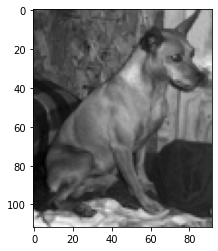

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

plt.imshow(D2train[250].reshape(112,92), cmap='gray')

# Show the plot
plt.show()

In [ ]:
Mu = np.zeros((2, 10304))

Mu[0]=np.mean(D2train[0:200,:], axis=0)
Mu[1]=np.mean(D2train[200:410,:], axis=0)

Sb=200*np.matmul((Mu[0]-np.mean(D2train, axis=0)),(Mu[0]-np.mean(D2train, axis=0)).T)+210*np.matmul((Mu[1]-np.mean(D2train, axis=0)),(Mu[1]-np.mean(D2train, axis=0)).T)
Sb=np.matmul((Mu[0]-Mu[1]),(Mu[0]-Mu[1]).T)


LDAcentertrain = np.zeros(((2,210,10304)))

for i in range(0,200):
  LDAcentertrain[0,i]=D2train[int(i)]-Mu[0]

for i in range(0,210):
  LDAcentertrain[1,i]=D2train[int(i+200)]-Mu[1]


# for i in range(0,40):
#   for j in range(0,200):
#     LDAcentertrain[i,j]+=D2train[int(i*5+j)]-Mu[int(i)]

S0 = np.zeros(((10304,10304)))
S1 = np.zeros(((10304,10304)))
S = np.zeros(((10304,10304)))

S0= np.matmul(LDAcentertrain[0,0:200].T,LDAcentertrain[0,0:200])
S1= np.matmul(LDAcentertrain[1].T,LDAcentertrain[1])
S=S0+S1


NameError: ignored

In [ ]:
print(Sb)

1685739617.6964345


In [ ]:
print(Mu[0])
print(Sb.shape)
print(IS.shape)

[85.12  84.89  85.165 ... 77.24  74.335 73.37 ]
()
(10304, 10304)


In [ ]:
IS = np.linalg.inv(S)

In [ ]:
eigenvalues_faces_nonface2, eigenvectors_faces_nonface2 = np.linalg.eigh(IS*Sb)

idx = np.argsort(-np.absolute(eigenvalues_faces_nonface2))   
eigenValues_faces_nonface2 = eigenvalues_faces_nonface2[idx]
eigenVectors_faces_nonface2 = eigenvectors_faces_nonface2[:,idx]

# idx = eigenvalues_faces_nonface2.argsort()[::-1]   
# eigenValues_faces_nonface2 = eigenvalues_faces_nonface2[idx]
# eigenVectors_faces_nonface2 = eigenvectors_faces_nonface2[:,idx]

In [ ]:
idx = eigenvalues_faces_nonface2.argsort()   
eigenValues_faces_nonface2 = eigenvalues_faces_nonface2[idx]
eigenVectors_faces_nonface2 = eigenvectors_faces_nonface2[:,idx]

In [ ]:
print(eigenValues_faces_nonface2[0])
print(eigenValues_faces_nonface2[10303])

2.111754573516674e+21
-2.1261494068528721e+21


In [ ]:
idx = np.argsort(np.absolute(eigenvalues_faces_nonface2))   
eigenValues_faces_nonface2 = eigenvalues_faces_nonface2[idx]
eigenVectors_faces_nonface2 = eigenvectors_faces_nonface2[:,idx]

In [ ]:
print(eigenVectors_faces_nonface2[0])
print(eigenVectors_faces_nonface2[10303])

[ 0.00452746  0.00210158  0.00095151 ...  0.01352421 -0.01380018
 -0.01364641]
[-0.00074631  0.00179589  0.00198046 ...  0.01171667  0.01148858
 -0.01144377]


In [ ]:
print(eigenValues_faces_nonface2[0])
print(eigenValues_faces_nonface2[10303])

In [ ]:

U2=eigenVectors_faces_nonface2[:,-2:]
projection_matrix2 = U2
projected_data_train2 = np.dot(projection_matrix2.T, D2Traincentered.T)
projected_data_test2 = np.dot(projection_matrix2.T, D2Testcentered.T)
print(U2.shape)
print(projection_matrix2.shape)
print(D2Traincentered.shape)

projected_data_train_real2 = np.real(projected_data_train2.T)
projected_data_test_real2 = np.real(projected_data_test2.T)


knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(projected_data_train_real2, labeltrain)
k2=knn.score(projected_data_test_real2, labeltest)
print("Accuracy : ",k2 )
print(projected_data_train_real2.shape)
print(labeltrain.shape)
print(projected_data_test_real2.shape)
print(labeltest.shape)

(10304, 2)
(10304, 2)
(410, 10304)
Accuracy :  0.5147058823529411
(410, 2)
(410, 1)
(340, 2)
(340, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ValueError: ignored

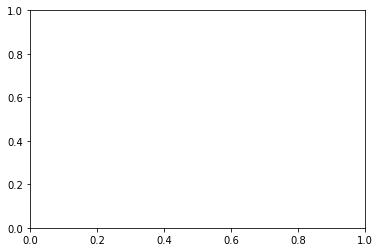

In [ ]:
import matplotlib.pyplot as plt
numbertest=[70,140,210]
plt.plot(numbertest,k)

# Set axis labels and title
plt.xlabel('number of nonface images')
plt.ylabel('accuracy')
plt.title('number of nonface images vs accuracy for alpha=0.85')

# Show the plot
plt.show()